In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import random
import seaborn as sns

pd.set_option("display.max_colwidth", 200)

%matplotlib inline

## Create Data Points

1. Create 6 groups with random number of elements in each group - 1000 data points in total
2. Make values normal distribution with specified mean and st dev

In [21]:
def make_fake_data_point():
    seed = random.randint(0,10)
    if seed < 2:
        return random.normalvariate(170, 40)
    if seed < 4:
        return random.normalvariate(80, 20)
    if seed < 5:
        return random.normalvariate(120, 10)
    if seed < 8:
        return random.normalvariate(320, 15)
    if seed < 9:
        return random.normalvariate(210, 10)
    return random.normalvariate(30, 5)

def create_fake_data(num_points):
    numbers = [int(make_fake_data_point()) for i in range(num_points)]
    return pd.DataFrame(numbers, columns=["number"])

In [22]:
df = create_fake_data(1000)
df.head()

,number
0,209
1,193
2,26
3,63
4,203


### Visualize data using a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11da0fc50>]],
      dtype=object)

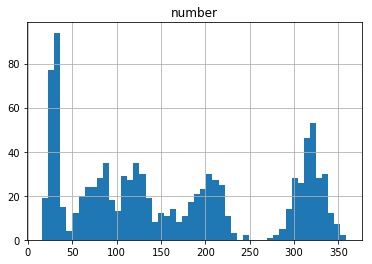

In [23]:
df.hist(bins=50)

# K-Means

1. Import the necessary packages from Sklearn
2. Select your features (save them as X)
3. Run K-Means with 4 and 6 clusters

In [24]:
from sklearn.cluster import KMeans
X = df[['number']]

# Make the clusters
km = KMeans(n_clusters=6)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

###  Predict group number of every data point in X

In [16]:
df['group'] = km.predict(X)
df.head(10)

,number,group
0,204,2
1,206,2
2,226,2
3,325,1
4,321,1
5,87,5
6,169,4
7,125,0
8,115,0
9,129,0


### Plot the results you predicted in a histogram

group
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
Name: number, dtype: object

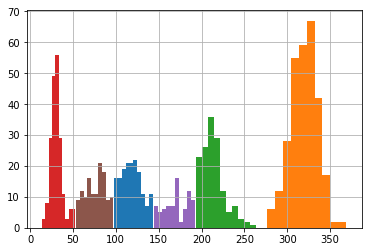

In [17]:
df.groupby('group').number.hist(bins=10)

### What if we increase the number of clusters
#### Run KMeans with 10 and 20 groups 

In [25]:
# Set up our X
X = df[['number']]

km = KMeans(n_clusters=10)
km.fit(X)

# Assign a group
df['group'] = km.predict(X)
df.head(3)

,number,group
0,209,8
1,193,2
2,26,3


### Plot the results

group
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
7    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
9    AxesSubplot(0.125,0.125;0.775x0.755)
Name: number, dtype: object

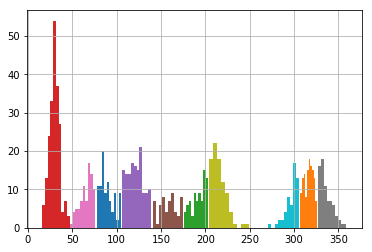

In [26]:
df.groupby('group').number.hist(bins=10)

### How to choose K? - Elbow Method
The goal is to find such `k` that for each cluster will not rise the variance significantly 

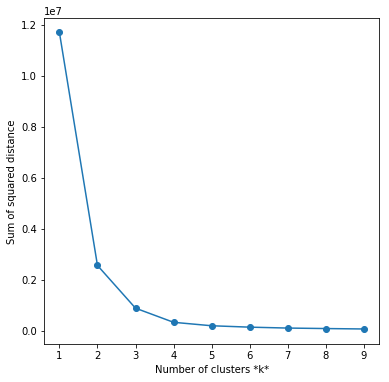

In [37]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


# 2-dimensional K-Means

### Read the zipcode data from "zipcodes.csv"

In [19]:
zipcodes = pd.read_csv("zipcodes.csv")
zipcodes.head()

,zip,city,state,latitude,longitude,timezone,dst
0,210,Portsmouth,NH,43.005895,-71.013202,-5,1
1,211,Portsmouth,NH,43.005895,-71.013202,-5,1
2,212,Portsmouth,NH,43.005895,-71.013202,-5,1
3,213,Portsmouth,NH,43.005895,-71.013202,-5,1
4,214,Portsmouth,NH,43.005895,-71.013202,-5,1


### Plot the latitude and longitude using a scatterplot

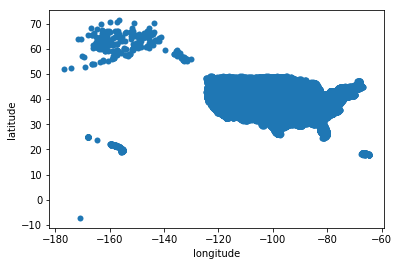

In [45]:
sns.scatterplot(data=zipcodes, x='longitude', y='latitude', linewidth=0)
plt.grid(False)

### Colour your plot by timezone

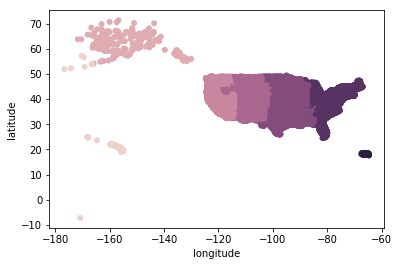

In [46]:
sns.scatterplot(data=zipcodes, x='longitude', y='latitude', linewidth=0, hue='timezone', legend=False)
plt.grid(False)

### Create a model with 10 clusters

In [132]:
# Set up X to be the latitude and longitude
X = zipcodes[['longitude', 'latitude']]

# Make the clusters
km = KMeans(n_clusters=10)
km.fit(X)

# Predict which group each combination of latitude and longitude will belong to
zipcodes['group'] = km.predict(X)
zipcodes.head(3)

,zip,city,state,latitude,longitude,timezone,dst,group
0,210,Portsmouth,NH,43.005895,-71.013202,-5,1,5
1,211,Portsmouth,NH,43.005895,-71.013202,-5,1,5
2,212,Portsmouth,NH,43.005895,-71.013202,-5,1,5


### Visualize the results in a scatterplot

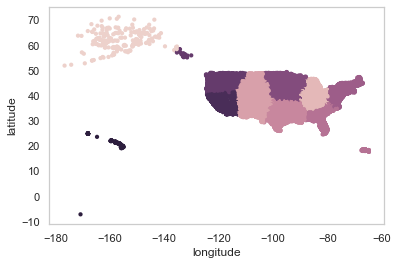

In [133]:
sns.scatterplot(data=zipcodes, x='longitude', y='latitude', linewidth=0, size=1, hue='group', legend=False)
plt.grid(False)

### Try to increase the number of clusters to 20

In [48]:
# Set up X
X = zipcodes[['longitude', 'latitude']]

# Make the clusters
km = KMeans(n_clusters=20)
km.fit(X)

# Assign a group
zipcodes['group'] = km.predict(X)
zipcodes.head(3)

,zip,city,state,latitude,longitude,timezone,dst,group
0,210,Portsmouth,NH,43.005895,-71.013202,-5,1,0
1,211,Portsmouth,NH,43.005895,-71.013202,-5,1,0
2,212,Portsmouth,NH,43.005895,-71.013202,-5,1,0


#### Plot the results

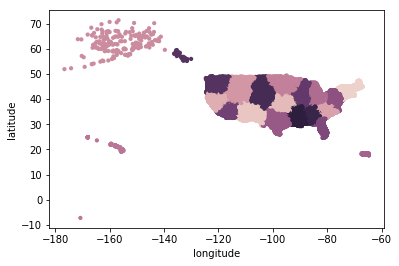

In [49]:
sns.scatterplot(data=zipcodes, x='longitude', y='latitude', linewidth=0, size=1, hue='group', legend=False)
plt.grid(False)

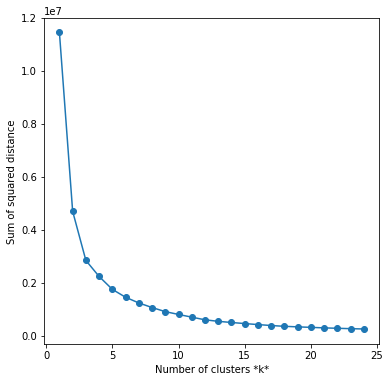

In [50]:
sse = []
list_k = list(range(1, 25))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');


# Now with words - Congressional speech data

Reference to the data: http://www.cs.cornell.edu/home/llee/data/convote.html

In [ ]:
# I downloaded this so you don't have to
# !curl -O http://www.cs.cornell.edu/home/llee/data/convote/convote_v1.1.tar.gz
# !tar -zxvf convote_v1.1.tar.gz

#### Read all the data from the `development_set` folder
Hint: use `glob.glob`

In [35]:
filenames = glob.glob('convote_v1.1/data_stage_one/development_set/*')
contents = [open(filename).read() for filename in filenames]
speeches = pd.DataFrame({
    'filename': filenames,
    'contents': contents
})
speeches.head()

,filename,contents
0,convote_v1.1/data_stage_one/development_set/493_400036_2346028_ROY.txt,"mr. chairman , i yield myself such time as i may consume . \nmr. chairman , when our forefathers in the 1960s wrote the 1964 civil rights act landmark legislation , they provided a specific exempt..."
1,convote_v1.1/data_stage_one/development_set/493_400321_2346025_RMY.txt,"mr. chairman , i rise in strong support of the school readiness act of 2005 . \ni would like to pay particular attention and highlight a provision of the bill granting greater flexibility to head ..."
2,convote_v1.1/data_stage_one/development_set/199_400322_1134008_ROY.txt,"mr. chairman , i make a point of order against the amendment . \nthe amendment constitutes legislation on an appropriations bill . \nunder the amendment , the limit on funds does not apply to road..."
3,convote_v1.1/data_stage_one/development_set/493_400103_2346087_DON.txt,"mr. chairman , i yield myself such time as i may consume . \nmr. chairman , for four decades , head start has provided comprehensive child development , literacy , family services to more than 18 ..."
4,convote_v1.1/data_stage_one/development_set/199_400300_2013034_DON.txt,"mr. speaker , i yield back the balance of my time . \n"


### From the content of the files extract:
    - filename
    - bill number
    - speaker number
    - bill vote
    - party

In [143]:
speeches['filename'] = speeches.filename.str[-26:]
speeches['bill no'] = speeches.filename.str[:3]
speeches['speaker no'] = speeches.filename.str[4:10]
speeches['bill vote'] = speeches.filename.str[-5]
speeches['party'] = speeches.filename.str[-7]
speeches.head()

,filename,contents,bill no,speaker no,bill vote,party
0,493_400036_2346028_ROY.txt,"mr. chairman , i yield myself such time as i may consume . \nmr. chairman , when our forefathers in the 1960s wrote the 1964 civil rights act landmark legislation , they provided a specific exempt...",493,400036,Y,R
1,493_400321_2346025_RMY.txt,"mr. chairman , i rise in strong support of the school readiness act of 2005 . \ni would like to pay particular attention and highlight a provision of the bill granting greater flexibility to head ...",493,400321,Y,R
2,199_400322_1134008_ROY.txt,"mr. chairman , i make a point of order against the amendment . \nthe amendment constitutes legislation on an appropriations bill . \nunder the amendment , the limit on funds does not apply to road...",199,400322,Y,R
3,493_400103_2346087_DON.txt,"mr. chairman , i yield myself such time as i may consume . \nmr. chairman , for four decades , head start has provided comprehensive child development , literacy , family services to more than 18 ...",493,400103,N,D
4,199_400300_2013034_DON.txt,"mr. speaker , i yield back the balance of my time . \n",199,400300,N,D


#### Convert the documents to vectors using `TfidfVectorizer`
1. Create the Vectorizer (don't forget about stop words)
2. Use Vectorizer to fit and transform the data
3. Transform the result into a df

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Can try with other values for max_features
#max_features=10000
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.25)
vectors = vectorizer.fit_transform(speeches.contents)

In [57]:
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,000,00007,018,050,092,10,100,106,107,108,...,youngsters,youth,yuan,zero,zeroing,zeros,zigler,zirkin,zoe,zoellick
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.039116,0.041298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Fit K-Means on the resulting data

In [58]:
%%time

km = KMeans(n_clusters=5)
km.fit(words_df)

CPU times: user 4.02 s, sys: 229 ms, total: 4.24 s
Wall time: 2.93 s


#### Print out the top 10 terms per cluster

In [59]:
top_n = 10
centroids = km.cluster_centers_.argsort()[:, ::-1][:, :top_n]
terms = vectorizer.get_feature_names()

for cluster_num, term_ids in enumerate(centroids):
    term_names = [terms[index] for index in term_ids]
    term_list = ", ".join(term_names)
    print(f"Cluster {cluster_num}: {term_list}")

Cluster 0: china, trade, madam, chinese, cafta, currency, wto, american, jobs, legislation
Cluster 1: balance, reserve, madam, speakers, reclaiming, continue, urge, vote, gentlewoman, think
Cluster 2: minutes, gentlewoman, vote, demand, recorded, house, california, consume, texas, offer
Cluster 3: claim, consent, unanimous, opposition, ask, oppose, xz4003000, obey, control, wisconsin
Cluster 4: start, head, children, program, religious, programs, school, discrimination, faith, based


# Recipes

### Read in recipes data from `recipes.csv`

In [222]:
recipes = pd.read_csv("recipes.csv", nrows=5000)
recipes.head()

,cuisine,id,ingredient_list
0,greek,10259,"romaine lettuce, black olives, grape tomatoes, garlic, pepper, purple onion, seasoning, garbanzo beans, feta cheese crumbles"
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, ground black pepper, thyme, eggs, green tomatoes, yellow corn meal, milk, vegetable oil"
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, green chilies, grilled chicken breasts, garlic powder, yellow onion, soy sauce, butter, chicken livers"
3,indian,22213,"water, vegetable oil, wheat, salt"
4,indian,13162,"black pepper, shallots, cornflour, cayenne pepper, onions, garlic paste, milk, butter, salt, lemon juice, water, chili powder, passata, oil, ground cumin, boneless chicken skinless thigh, garam ma..."


### Follow the logic from the previous example to trasform the data to vectors

In [226]:
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(recipes.ingredient_list)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,10,100,abalone,abbamele,acai,achiote,ackee,acorn,acting,active,added,adobo,adzuki,agave,aged,ahi,aioli,ajwain,albacore,alcohol,ale,aleppo,alfredo,all,allspice,almond,almonds,amaranth,amaretti,amaretto,amchur,american,aminos,ampalaya,anaheim,ancho,anchovies,anchovy,and,andouille,angel,anglaise,angostura,anise,anjou,annatto,apple,apples,applesauce,applewood,apricot,apricots,arame,arbol,arborio,argo,armagnac,arrowroot,artichok,artichoke,artichokes,arugula,asadero,asafetida,asafoetida,asiago,asian,asparagus,atta,avocado,avocados,açai,baby,bacardi,back,bacon,bagels,bags,baguette,baileys,baked,baking,balls,balsamic,balsamico,bamboo,banana,bananas,banh,bar,barbecue,barbecued,barilla,bark,barley,bars,bartlett,base,basil,basmati,...,undrain,unflavored,unsalted,unsweetened,urad,usukuchi,valley,vanilla,varnish,veal,vegan,veget,vegetable,vegetables,vegetarian,veggies,velveeta,venison,verde,vermicelli,vermouth,verts,vidalia,vie,vietnamese,vin,vinaigrette,vine,vinegar,vineyard,virgin,vodka,wafer,wafers,wagon,wakame,walnut,walnuts,warm,wasabi,water,watercress,watermelon,wax,waxy,wedge,wedges,weed,well,wheat,wheels,whey,whip,whipped,whipping,whiskey,white,whitefish,whites,whole,wide,wild,williams,wine,wing,wings,winter,wish,with,won,wondra,wonton,wood,worcestershire,world,wrappers,wraps,xanthan,xuxu,yam,yams,yardlong,yeast,yellow,yellowtail,yoghurt,yogurt,yolk,yolks,yoplait,york,yukon,zatarain,zero,zest,zesty,zinfandel,ziti,zucchini,épices
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.274418,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227619,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [227]:
words_df.shape

(5000, 1884)

#### Fit K-Means on the resulting data 

In [228]:
%%time

km = KMeans(n_clusters=3)
km.fit(vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Print out the top 10 terms per cluster

In [229]:
# Print out the top 10 terms per cluster
top_n = 10
centroids = km.cluster_centers_.argsort()[:, ::-1][:, :top_n]
terms = vectorizer.get_feature_names()

for cluster_num, term_ids in enumerate(centroids):
    term_names = [terms[index] for index in term_ids]
    term_list = ", ".join(term_names)
    print(f"Cluster {cluster_num}: {term_list}")

Cluster 0: pepper, ground, fresh, salt, oil, cheese, garlic, olive, black, tomatoes
Cluster 1: sugar, flour, purpose, all, butter, milk, eggs, baking, vanilla, large
Cluster 2: sauce, soy, sesame, oil, rice, sugar, ginger, garlic, onions, chicken


### More clusters

In [230]:
%%time

km = KMeans(n_clusters=10)
km.fit(vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [231]:
# Print out the top 10 terms per cluster
top_n = 10
centroids = km.cluster_centers_.argsort()[:, ::-1][:, :top_n]
terms = vectorizer.get_feature_names()

for cluster_num, term_ids in enumerate(centroids):
    term_names = [terms[index] for index in term_ids]
    term_list = ", ".join(term_names)
    print(f"Cluster {cluster_num}: {term_list}")

Cluster 0: lime, cilantro, fresh, juice, chopped, onion, chilies, jalapeno, pepper, garlic
Cluster 1: ground, cumin, powder, coriander, pepper, salt, chili, garlic, ginger, oil
Cluster 2: yeast, warm, flour, active, water, dry, sugar, purpose, all, salt
Cluster 3: cheese, parmesan, grated, pepper, mozzarella, fresh, olive, pasta, garlic, salt
Cluster 4: sauce, soy, sesame, oil, rice, ginger, sugar, garlic, onions, vinegar
Cluster 5: flour, baking, purpose, all, eggs, sugar, butter, powder, salt, milk
Cluster 6: cheese, shredded, tortillas, cheddar, cream, sour, salsa, beans, chicken, jack
Cluster 7: sugar, vanilla, milk, cream, extract, egg, butter, large, water, chocolate
Cluster 8: olive, fresh, oil, virgin, extra, pepper, lemon, parsley, garlic, salt
Cluster 9: pepper, salt, chicken, onions, oil, garlic, black, green, water, butter


# Harry Potter Fanfiction

In [232]:
filenames = glob.glob('fanfiction-harry-potter/*')
contents = [open(filename).read() for filename in filenames]
fanfiction = pd.DataFrame({
    'filename': filenames,
    'contents': contents
})
fanfiction.head()

,filename,contents
0,fanfiction-harry-potter/10120906.txt,"PrefaceA/N: Hello! This is the first ""chapter"", but since it doesn't really have to do with the story line other than the background, so I'm calling it the Preface. A special thanks to my friend T..."
1,fanfiction-harry-potter/10571996.txt,"A/N: Ok, if the title and summary wasn't clear enough, this is basically Wicked for Bellatrix Lestange. Now, I'm going to be taking some liberties with characters and timelines and ages and such t..."
2,fanfiction-harry-potter/10608235.txt,"Red DustA/N: The Kbler-Ross is real and widely accepted by the public, it has yet to be validated by research studies. It refers to five stages of grief, describing a series of emotional stages ex..."
3,fanfiction-harry-potter/10613601.txt,She's the absynth on my lips (the splinter in my fingertips)Prompt: RedRating: MWarnings: Alternate Universe - Canon Divergence / Hermione is a year younger as Tom / they're both in Hogwarts at th...
4,fanfiction-harry-potter/10603412.txt,"So I've changed just a few things about Barty's original story, but nothing that changes the character. I just thought I should let you know before you read it and are like, ""What? That's not what..."


In [240]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')

X = vectorizer.fit_transform(fanfiction.contents)

In [241]:
%%time

km = KMeans(n_clusters=2)
km.fit(X)

CPU times: user 2min 29s, sys: 3.36 s, total: 2min 33s
Wall time: 2min 18s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [242]:
# Print out the top ten words for each cluster
top_n = 10
centroids = km.cluster_centers_.argsort()[:, ::-1][:, :top_n]
terms = vectorizer.get_feature_names()

for cluster_num, term_ids in enumerate(centroids):
    term_names = [terms[index] for index in term_ids]
    term_list = ", ".join(term_names)
    print(f"Cluster {cluster_num}: {term_list}")

Cluster 0: harry, hermione, draco, said, just, ron, like, ginny, know, eyes
Cluster 1: lily, james, sirius, remus, said, harry, just, eyes, potter, like
